## Removing the outliers

## Import libraries

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## import dataset

In [192]:
df = pd.read_csv('HousingData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [193]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


#### Since the classification depends on CHAS column, therefore it cannot have missing data.

In [194]:
df.CHAS.fillna(df.CHAS.mode()[0], inplace=True)
df.CHAS.isna().sum()

0

# Outliers

In [195]:
print("Outliers based on 99th percentile method\n")

for k, v in df.items():
    LB = v.quantile(0.01)
    UB = v.quantile(0.99)
    
    v_col = v[(v < LB) | (v > UB)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    
    print(f"{k} has {perc:.2f}% of outliers")

Outliers based on 99th percentile method

CRIM has 1.98% of outliers
ZN has 0.99% of outliers
INDUS has 1.78% of outliers
CHAS has 0.00% of outliers
NOX has 0.99% of outliers
RM has 2.37% of outliers
AGE has 0.99% of outliers
DIS has 2.37% of outliers
RAD has 0.00% of outliers
TAX has 1.19% of outliers
PTRATIO has 0.99% of outliers
B has 1.19% of outliers
LSTAT has 1.98% of outliers
MEDV has 1.19% of outliers


In [196]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.250605,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### CRIM

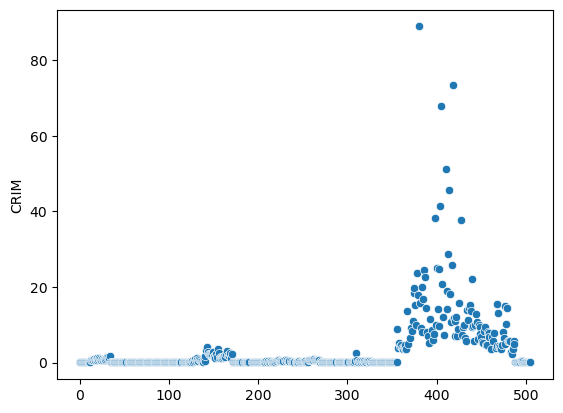

In [197]:
sns.scatterplot(data=df['CRIM'])
plt.show()

In [198]:
LB = df['CRIM'].quantile(0.01)
UB = df['CRIM'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 42.16173499999991
lower bound: 0.0135265


In [199]:
df['CRIM'][(df['CRIM'] < LB) | (df['CRIM'] > UB)]

0       0.00632
55      0.01311
284     0.00906
285     0.01096
341     0.01301
380    88.97620
405    67.92080
410    51.13580
414    45.74610
418    73.53410
Name: CRIM, dtype: float64

### start to remove:

In [200]:
new = df[~((df['CRIM'] < LB) | (df['CRIM'] > UB))]

In [201]:
new['CRIM'][(new['CRIM'] < LB) | (new['CRIM'] > UB)] = np.median(new['CRIM'])

### ZN

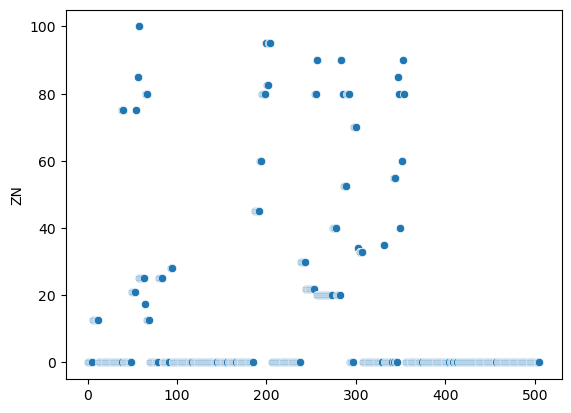

In [202]:
sns.scatterplot(data=new['ZN'])
plt.show()

In [203]:
LB = new['ZN'].quantile(0.01)
UB = new['ZN'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 91.25
lower bound: 0.0


In [204]:
new['ZN'][(new['ZN'] < LB) | (new['ZN'] > UB)]

57     100.0
199     95.0
200     95.0
203     95.0
204     95.0
Name: ZN, dtype: float64

In [205]:
new['ZN'][(new['ZN'] < LB) | (new['ZN'] > UB)] = np.median(new['ZN'])

### RM

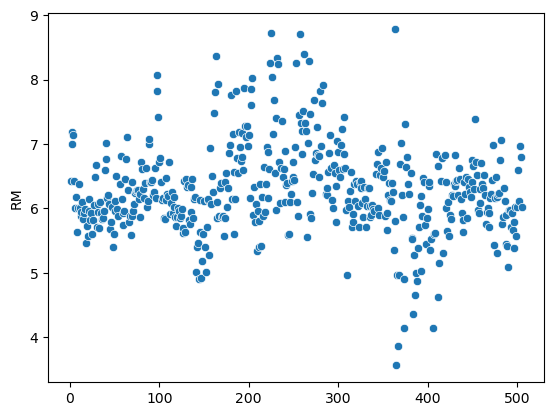

In [206]:
sns.scatterplot(data=new['RM'])
plt.show()

In [207]:
LB = new['RM'].quantile(0.01)
UB = new['RM'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 8.3389
lower bound: 4.615


In [208]:
new['RM'][(new['RM'] < LB) | (new['RM'] > UB)] 

163    8.375
225    8.725
257    8.704
262    8.398
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
406    4.138
Name: RM, dtype: float64

In [209]:
new['RM'][(new['RM'] < LB) | (new['RM'] > UB)] = np.median(new['RM'])

### DIS

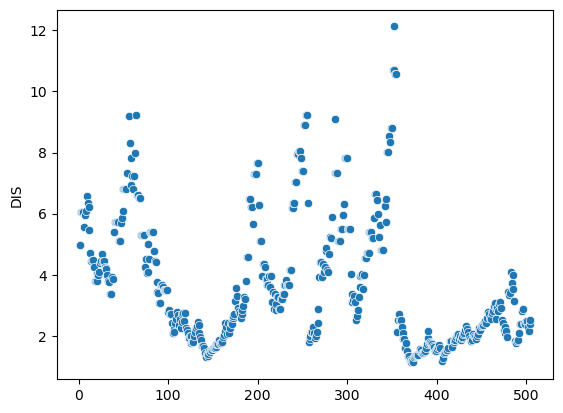

In [210]:
sns.scatterplot(data=new['DIS'])
plt.show()

In [211]:
LB = new['DIS'].quantile(0.01)
UB = new['DIS'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 9.291040000000015
lower bound: 1.201185


In [212]:
new[(new['DIS'] < LB) | (new['DIS'] > UB)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,NaN,1.91,0.0,0.413,5.936,NaN,10.5857,4,334,22.0,376.04,5.57,20.6
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,6.205,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
406,20.71620,0.0,NaN,0.0,0.659,6.205,100.0,1.1781,24,666,20.2,370.22,23.34,11.9


In [213]:
new['DIS'][(new['DIS'] < LB) | (new['DIS'] > UB)] = np.median(new['DIS'])

### PTRATIO

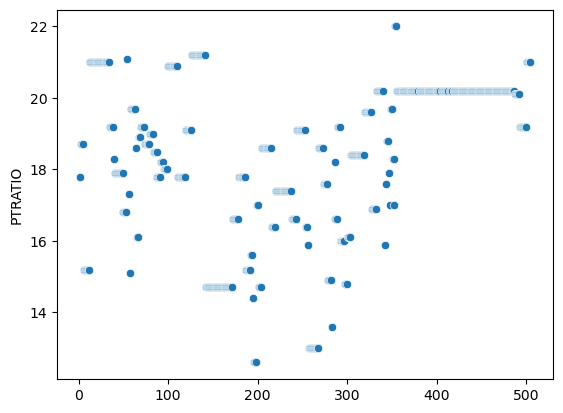

In [214]:
sns.scatterplot(data=new['PTRATIO'])
plt.show()

In [215]:
LB = new['PTRATIO'].quantile(0.01)
UB = new['PTRATIO'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 21.2
lower bound: 13.0


In [216]:
new['PTRATIO'][(new['PTRATIO'] < LB) | (new['PTRATIO'] > UB)]

196    12.6
197    12.6
198    12.6
354    22.0
355    22.0
Name: PTRATIO, dtype: float64

In [217]:
new['PTRATIO'][(new['PTRATIO'] < LB) | (new['PTRATIO'] > UB)] = np.median(new['PTRATIO'])

### B

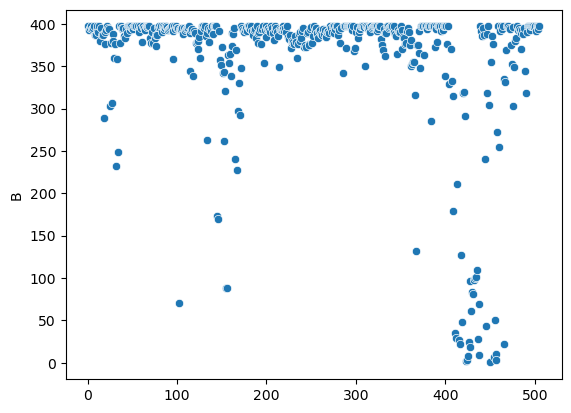

In [218]:
sns.scatterplot(data=new['B'])
plt.show()

In [219]:
LB = new['B'].quantile(0.01)
UB = new['B'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 396.9
lower bound: 7.63


In [220]:
new['B'][(new['B'] < LB) | (new['B'] > UB)]

423    2.52
424    3.65
450    0.32
454    6.68
457    3.50
Name: B, dtype: float64

In [221]:
new['B'][(new['B'] < LB) | (new['B'] > UB)] = np.median(new['B'])

### LSTAT

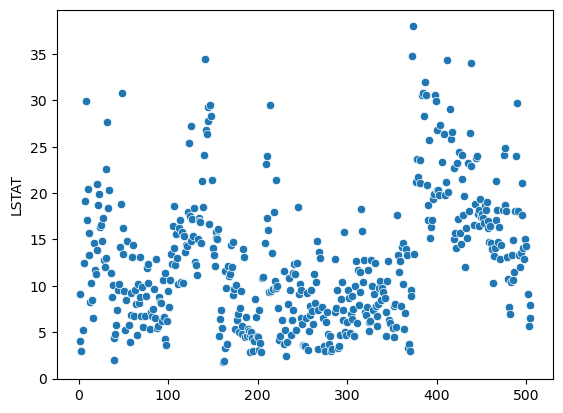

In [222]:
sns.scatterplot(data=new['LSTAT'])
plt.show()

In [223]:
LB = new['LSTAT'].quantile(0.01)
UB = new['LSTAT'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 32.4975
lower bound: 2.8775


In [224]:
new['LSTAT'][(new['LSTAT'] < LB) | (new['LSTAT'] > UB)]

40      1.98
141    34.41
161     1.73
162     1.92
192     2.87
232     2.47
373    34.77
374    37.97
412    34.37
438    34.02
Name: LSTAT, dtype: float64

In [225]:
new['LSTAT'][(new['LSTAT'] < LB) | (new['LSTAT'] > UB)] = np.median(new['LSTAT'])

### MEDV

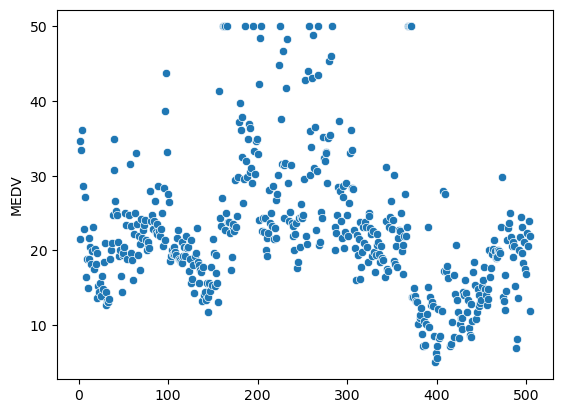

In [226]:
sns.scatterplot(data=new['MEDV'])
plt.show()

In [227]:
LB = new['MEDV'].quantile(0.01)
UB = new['MEDV'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 50.0
lower bound: 7.2


In [228]:
new['MEDV'][(new['MEDV'] < LB) | (new['MEDV'] > UB)]

398    5.0
399    6.3
400    5.6
489    7.0
Name: MEDV, dtype: float64

In [229]:
new['MEDV'][(new['MEDV'] < LB) | (new['MEDV'] > UB)] = np.median(new['MEDV'])

### INDUS

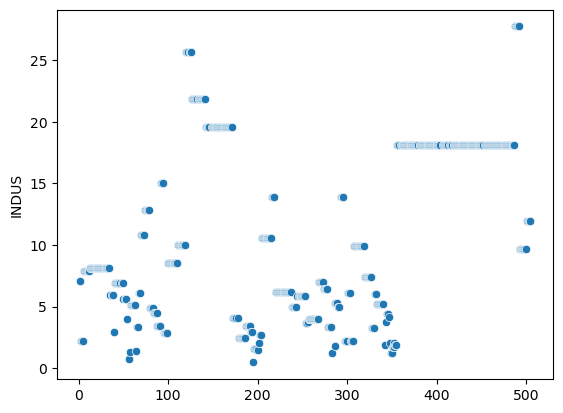

In [230]:
sns.scatterplot(data=new['INDUS'])
plt.show()

In [231]:
LB = new['INDUS'].quantile(0.01)
UB = new['INDUS'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 26.1725
lower bound: 1.3025


In [232]:
new['INDUS'][(new['INDUS'] < LB) | (new['INDUS'] > UB)]

56      0.74
195     0.46
283     1.21
349     1.25
350     1.25
488    27.74
489    27.74
490    27.74
491    27.74
492    27.74
Name: INDUS, dtype: float64

In [233]:
new['INDUS'][(new['INDUS'] < LB) | (new['INDUS'] > UB)] = np.median(new['INDUS'])

### NOX

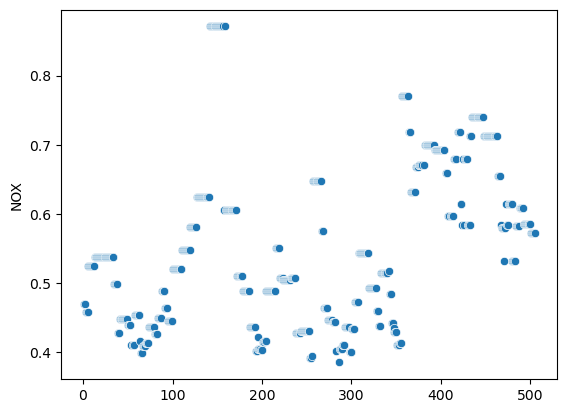

In [234]:
sns.scatterplot(data=new['NOX'])
plt.show()

In [235]:
LB = new['NOX'].quantile(0.01)
UB = new['NOX'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 0.871
lower bound: 0.398


In [236]:
new['NOX'][(new['NOX'] < LB) | (new['NOX'] > UB)]

254    0.392
255    0.392
256    0.394
286    0.385
Name: NOX, dtype: float64

In [237]:
new['NOX'][(new['NOX'] < LB) | (new['NOX'] > UB)] = np.median(new['NOX'])

### AGE

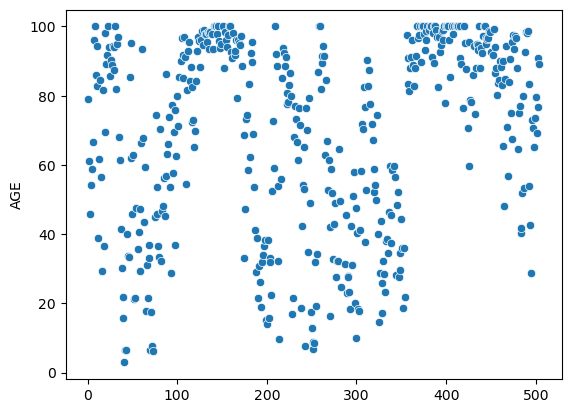

In [238]:
sns.scatterplot(data=new['AGE'])
plt.show()

In [239]:
LB = new['AGE'].quantile(0.01)
UB = new['AGE'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 100.0
lower bound: 6.75


In [240]:
new['AGE'][(new['AGE'] < LB) | (new['AGE'] > UB)]

41    2.9
42    6.6
43    6.5
70    6.6
73    6.2
Name: AGE, dtype: float64

In [241]:
new['AGE'][(new['AGE'] < LB) | (new['AGE'] > UB)] = np.median(new['AGE'])

### RAD

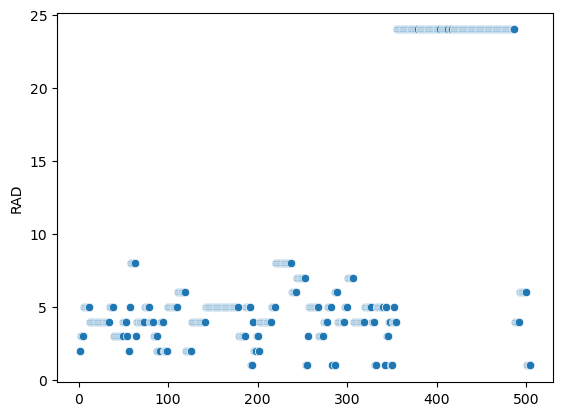

In [242]:
sns.scatterplot(data=new['RAD'])
plt.show()

In [243]:
LB = new['RAD'].quantile(0.01)
UB = new['RAD'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 24.0
lower bound: 1.0


In [244]:
new['RAD'][(new['RAD'] < LB) | (new['RAD'] > UB)]

Series([], Name: RAD, dtype: int64)

#### There is no outliers detected in RAD column based on 99th percentile technique.

### TAX

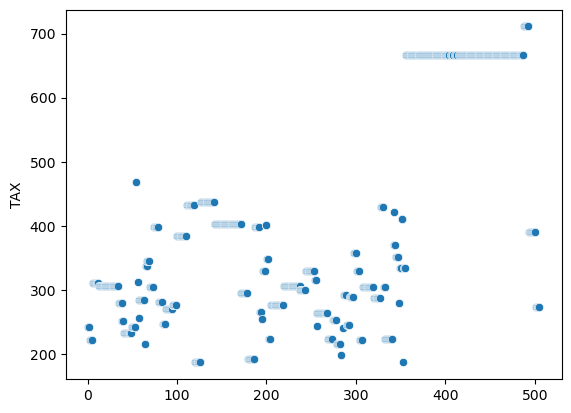

In [245]:
sns.scatterplot(data=new['TAX'])
plt.show()

In [246]:
LB = new['TAX'].quantile(0.01)
UB = new['TAX'].quantile(0.99)
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 668.2500000000005
lower bound: 188.0


In [247]:
new['TAX'][(new['TAX'] < LB) | (new['TAX'] > UB)]

353    187
488    711
489    711
490    711
491    711
492    711
Name: TAX, dtype: int64

In [248]:
new['TAX'][(new['TAX'] < LB) | (new['TAX'] > UB)] = np.median(new['TAX'])

In [249]:
new.shape

(496, 14)

In [250]:
(len(new)/len(df))*100

98.02371541501977

In [251]:
(len(df)-len(new))/len(df)*100

1.9762845849802373

#### After eliminating the outliers, there are 98.02% data remaining in dataframe. It can be said there are 1.97% outliers have been identified using percentile (99th).

In [252]:
new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,476.000000,471.000000,466.000000,496.000000,496.000000,496.000000,471.000000,496.000000,496.000000,496.000000,496.00000,496.000000,466.000000,496.000000
mean,3.000011,9.938429,11.035279,0.068548,0.555967,6.281321,69.193631,3.729244,9.481855,403.397177,18.49123,361.998216,12.562082,22.721774
std,5.856450,21.288905,6.576114,0.252940,0.114744,0.618541,27.274256,1.940341,8.637227,164.788722,2.10144,81.074397,6.680130,9.023064
min,0.013600,0.000000,1.320000,0.000000,0.398000,4.628000,6.800000,1.202400,1.000000,188.000000,13.00000,7.680000,2.880000,7.200000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.894000,45.800000,2.121275,4.000000,279.000000,17.40000,376.140000,7.192500,17.275000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,77.300000,3.207450,5.000000,330.000000,19.05000,391.407500,11.465000,21.200000
75%,3.359357,0.000000,18.100000,0.000000,0.624000,6.593500,93.950000,5.100400,24.000000,666.000000,20.20000,396.232500,16.635000,25.000000
max,41.529200,90.000000,25.650000,1.000000,0.871000,8.337000,100.000000,9.222900,24.000000,666.000000,21.20000,396.900000,31.990000,50.000000


In [253]:
new.CHAS = new.CHAS.astype(str)
new.CHAS = new.CHAS.replace('0.0', '0')
new.CHAS = new.CHAS.replace('1.0', '1')

new.CHAS = new.CHAS.replace('nan', np.NaN)
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 1 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     476 non-null    float64
 1   ZN       471 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     496 non-null    object 
 4   NOX      496 non-null    float64
 5   RM       496 non-null    float64
 6   AGE      471 non-null    float64
 7   DIS      496 non-null    float64
 8   RAD      496 non-null    int64  
 9   TAX      496 non-null    int64  
 10  PTRATIO  496 non-null    float64
 11  B        496 non-null    float64
 12  LSTAT    466 non-null    float64
 13  MEDV     496 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 58.1+ KB


In [254]:
new.to_csv('hd4_outlier_remove.csv', index=False)